# Homework

For this homework you will need `numpy` and at the end `matplotlib`. Remember from day 1 how to install packages which are missing.

## Local vs. Global

In this part of the homework we will explore the difference between global and local variables. Local variables are either defined or assigned in the function or are a function input. Global variables exist outside and can be modified from within a function.

Make a new RMPs list with `-80` as first element local so that the global `RMPs` is not changed and stays with `-81`.

Hint:

Think about the placement of the list.

In [ ]:
RMPs = [-81, -76, -71, -78]
# have a local RMPs = [-80, -76, -71, -78]

def rmp_change_local():
    # add code
    RMPs = [-80, -76, -71, -78]
    print(RMPs)

rmp_change_local()
print(RMPs)

Write a function called `rmp_change` that changes the global variable `RMPs` and changes the first position from `-81` to `-80`

In [16]:
RMPs = [-81, -76, -71, -78]

# modify the function to change the RMPs list
def rmp_change_global():
    RMPs[0] = -80

rmp_change_global()
print(RMPs)

[-81, -76, -71, -78]


Now we want to avoid that the global `RMPs` are changed and only a local change should be performed. Write the function so that the global list stays the same and the first element in the list is only changed locally.

Hint:

Assigning a list a new variable does not copy the variable, however, lists have an attribute `mylist.copy()` which makes a copy.

In [ ]:
RMPs = [-81, -76, -71, -78]

# modify the function to change the RMPs list inside the function
# print the the local modified list additionally to the global list
# after the function
def rmp_change_local_modification():
    # add the code here
    RMPs_local = RMPs.copy()
    RMPs_local[0] = -80
    print(RMPs_local)

rmp_change_local_modification()

# global list
print(RMPs)

In [ ]:
# Second possible solution
RMPs = [-81, -76, -71, -78]
def rmp_change_local_modification():
    # add the code here
    RMPs = [-80, -76, -71, -78]
    print(RMPs)

rmp_change_local_modification()

# global list
print(RMPs)

This part of the homework we will work through the different "control flows" which were discussed on day 2. Control flows are procedures which enable you to process information sequentially.

## Conditional statements

The simplest statement one can use is the `if` statement. It can be extended by `elif` or `else`, but can also exist by itself.

In [11]:
RMP = -30
threshold = -34

Write an if statement that checks if the `RMP` is larger than the `threshold` and set the `RMP` to `10`. Print the new `RMP` after the statement.

In [12]:
#  write if statement
if RMP > threshold:
    RMP = 10
print(RMP)

-30


Write a function called `spike_simulation` using the same if statement you just wrote.

Expand it:
- also check if `RMP` is `10`
    - if `RMP` is `10` it should be reset to `-70`
- should the `RMP` be something else the new `RMP` should be the old `RMP`
- finally the function should return the new `RMP`

Hint:

Think about the order if statements. The first element will always have the priority and might skip your second statement.

In [9]:
RMP = -30
def spike_simulation(RMP, threshold):
    # add your code
    if RMP == 10:
        RMP = -70    
    elif RMP > threshold:
        RMP = 10
    else:
        RMP = RMP
    return RMP

RMP = spike_simulation(RMP, threshold)

print(RMP) # should be 10

RMP = spike_simulation(RMP, threshold)

print(RMP) # should be -70

10
-70


## For loops

Here we will take a look at how loops can be useful. They let you repeat procedures for every element in your *iterable*.
Check in the next box if all the elements are `True`.

In [1]:
# note: the "*4" at the end of the list repeats the list 4 times
input_list = [True, False, False, False, True, False, True, False, True, False] * 4

# are all of the elements in the list True? write your answer as a boolean
all(input_list)

False

Write a `for` loop which runs over the `input_list` and print "input" for every element that is `True`. At the same time count the number of inputs inside the loop and print them at the end.

Hint:

Add up counts inside a for loop.

In [2]:
# write your loop here
number_of_inputs = 0
for input in input_list:
    if input:
        number_of_inputs += 1
        print("input")

print('The number of inputs is', number_of_inputs)
# expected output: The number of inputs is 16

input
input
input
input
input
input
input
input
input
input
input
input
input
input
input
input
The number of inputs is 16


For the next step we want to simulate the input size. numpy offers some functions we can use to generate a random number. In this example we generate a number and then convert it to a `float`

In [5]:
import numpy as np

# set the seed to 2025 so that we all get the same numbers
np.random.seed(2025)

# the normal() function generates a random number
# the first element is the mean, the second the standard deviation

np.random.normal(5, 1)

4.907609822659935

Using the same approach as before we want to generate a random number if an input is detected and add it to the `RMP`. This will be our new resting membrane potential. The random number should follow the same mean and standard deviation as before `np.random.normal(5, 1)`. For every non-existing input (`False`) add a `0` to the list.


In [7]:
np.random.seed(2025)

RMP = -70
for input in input_list:
    # add your code here
    if input:
        RMP += np.random.normal(5, 1)
    else:
        RMP += 0

# expected output: 8.0976
print(np.round(RMP, 4))


8.0976


Use the same for loop you just wrote and modify it so that with every iteration you use your `spike_simulation` for the `RMP`.

The new `RMP` should be appended to the output list (`RMP_list`).

If the new `RMP` is over `0` you get a spike. Add a spike counter and return the number of spikes at the end.

In [14]:
np.random.seed(2025)

threshold = -34
RMP = -70
RMP_list = []
spike_counter = 0

for input in input_list:
    # add your code here
    if input:
        RMP += np.random.normal(5, 1)
    else:
        RMP += 0
    RMP = spike_simulation(RMP, threshold)
    RMP_list.append(RMP)
    if RMP > 0:
        spike_counter += 1 # or spike_counter = spike_counter + 1


print(spike_counter) # you should get 2 spikes

2


In [15]:
print(RMP_list)

# the last value in your list should be rounded to -66.7893
print(np.round(RMP_list[-1], 4))

[-65.09239017734006, -65.09239017734006, -65.09239017734006, -65.09239017734006, -59.35810460552186, -59.35810460552186, -55.796986630659845, -55.796986630659845, -51.46040865560304, -51.46040865560304, -46.56113674389604, -46.56113674389604, -46.56113674389604, -46.56113674389604, -39.41415017061042, -39.41415017061042, 10, -70, -65.20737113206187, -65.20737113206187, -59.443783845988094, -59.443783845988094, -59.443783845988094, -59.443783845988094, -54.23873019572902, -54.23873019572902, -50.28022636977449, -50.28022636977449, -46.10830245914271, -46.10830245914271, -42.1620981442655, -42.1620981442655, -42.1620981442655, -42.1620981442655, -37.25085680896706, -37.25085680896706, 10, -70, -66.78932304725188, -66.78932304725188]
-66.7893


Let's take a look at the activity.
For this we can plot the list with `matplotlib`. We will learn more about this in the future.

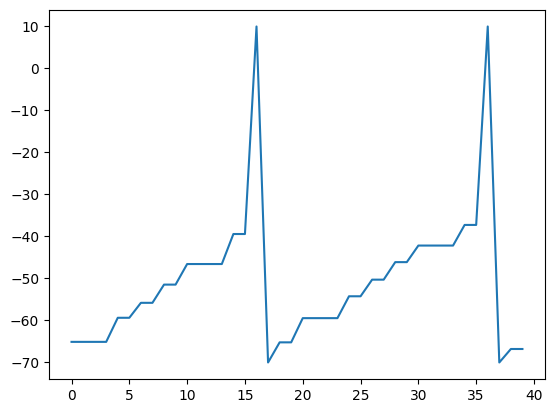

In [16]:
import matplotlib.pyplot as plt
plt.plot(RMP_list)

Congratulations you simulated your first spike train!

Now find the index of where you generated a spike. Don't forget a spike is a potential larger than 0. You can now write a for loop which looks for spikes in your new `RMP_list` and prints the index when you found a spike.


Hint:

Use a counter for the location.

In [17]:
# write the for loop to print the spike location
spike_location = 0
for RMP in RMP_list:
    if RMP > 0:
        print(spike_location)
    spike_location += 1

# expected output: 16 and 36

16
36
